## Installing packages

In [78]:
# pip install tensorflow
# pip install matplotlib

## Imporing libraries

In [71]:
import pathlib
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.activations import relu, linear, softmax
from sklearn.model_selection import train_test_split

## Path to dataset and print count of images

In [72]:
dataset_lib = pathlib.Path("D:/Projects/Python/science-project/dataset/train")
image_count = len(list(dataset_lib.glob("*/*.jpeg")))
print(f"Images: {image_count}")

Images: 9678


## Images parametrs

In [73]:
batch_size = 32
img_width = 28
img_height = 28

## Creating training and validation datasets

In [77]:
full_ds = tf.keras.utils.image_dataset_from_directory(
    dataset_lib,
    image_size=(img_height, img_width),
    batch_size=batch_size,
    shuffle=True
)

train_ds, val_ds = train_test_split(full_ds, test_size=0.2)

class_names = train_ds.class_names
num_classes = len(class_names)
print(f"Class names: {class_names}")

Found 9700 files belonging to 5 classes.


TypeError: Singleton array array(<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 28, 28, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>,
      dtype=object) cannot be considered a valid collection.

## Caching datasets

In [ ]:
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

## Creating model

In [ ]:
model_agumentation = tf.keras.models.Sequential([
    tf.keras.layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
])

model = Sequential()
model.add(model_agumentation);
model.add(Convolution2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,3)))
model.add(Convolution2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Convolution2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(Convolution2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))
model.summary()

## Compiling model

In [65]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

## Training model

In [67]:
print()
print('Training start...')
print()

epochs = 20
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs
)


Training start...

Epoch 1/20
243/243 [==============================] - 9s 39ms/step - loss: 0.8672 - accuracy: 0.6469 - val_loss: 0.9777 - val_accuracy: 0.6108
Epoch 2/20
243/243 [==============================] - 10s 41ms/step - loss: 0.8382 - accuracy: 0.6624 - val_loss: 0.9703 - val_accuracy: 0.6082
Epoch 3/20
243/243 [==============================] - 9s 38ms/step - loss: 0.8061 - accuracy: 0.6785 - val_loss: 0.9771 - val_accuracy: 0.6149
Epoch 4/20
243/243 [==============================] - 9s 35ms/step - loss: 0.7663 - accuracy: 0.6880 - val_loss: 0.9829 - val_accuracy: 0.6211
Epoch 5/20
243/243 [==============================] - 9s 36ms/step - loss: 0.7385 - accuracy: 0.7081 - val_loss: 0.9416 - val_accuracy: 0.6284
Epoch 6/20
243/243 [==============================] - 9s 36ms/step - loss: 0.7154 - accuracy: 0.7135 - val_loss: 0.9533 - val_accuracy: 0.6284
Epoch 7/20
243/243 [==============================] - 9s 36ms/step - loss: 0.6655 - accuracy: 0.7326 - val_loss: 0.9543 -

## Statistics

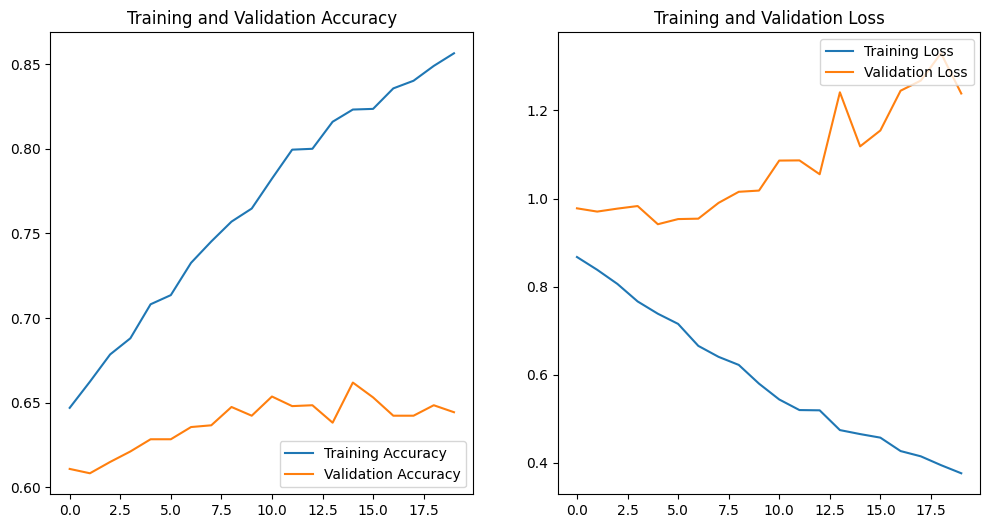


Training end!
Saving model...
Model saved!


In [68]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label="Training Accuracy")
plt.plot(epochs_range, val_acc, label="Validation Accuracy")
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label="Training Loss")
plt.plot(epochs_range, val_loss, label="Validation Loss")
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.show()

print()
print('Training end!')
print('Saving model...')

#model.save('architecture.keras')

print('Model saved!')